In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pylab

[kaggle](https://www.kaggle.com/open-powerlifting/powerlifting-database)

In [ ]:
! pip install -q kaggle
from google.colab import files
files.upload()

Saving 11741_395080_bundle_archive.zip to 11741_395080_bundle_archive.zip


In [ ]:
!unzip 11741_395080_bundle_archive.zip

Archive:  11741_395080_bundle_archive.zip
replace openpowerlifting.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [ ]:
df = pd.read_csv("openpowerlifting.csv")
print(df.shape)
df.head()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (35) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(1423354, 37)


,Name,Sex,Event,Equipment,Age,AgeClass,Division,BodyweightKg,WeightClassKg,Squat1Kg,Squat2Kg,Squat3Kg,Squat4Kg,Best3SquatKg,Bench1Kg,Bench2Kg,Bench3Kg,Bench4Kg,Best3BenchKg,Deadlift1Kg,Deadlift2Kg,Deadlift3Kg,Deadlift4Kg,Best3DeadliftKg,TotalKg,Place,Wilks,McCulloch,Glossbrenner,IPFPoints,Tested,Country,Federation,Date,MeetCountry,MeetState,MeetName
0,Abbie Murphy,F,SBD,Wraps,29.0,24-34,F-OR,59.8,60,80.0,92.5,105.0,NaN,105.0,45.0,50.0,55.0,NaN,55.0,110.0,120.0,130.0,NaN,130.0,290.0,4,324.16,324.16,286.42,511.15,NaN,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup
1,Abbie Tuong,F,SBD,Wraps,29.0,24-34,F-OR,58.5,60,100.0,110.0,120.0,NaN,120.0,55.0,62.5,67.5,NaN,67.5,130.0,140.0,145.0,NaN,145.0,332.5,2,378.07,378.07,334.16,595.65,NaN,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup
2,Ainslee Hooper,F,B,Raw,40.0,40-44,F-OR,55.4,56,NaN,NaN,NaN,NaN,NaN,27.5,32.5,-35.0,NaN,32.5,NaN,NaN,NaN,NaN,NaN,32.5,1,38.56,38.56,34.12,313.97,NaN,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup
3,Amy Moldenhauer,F,SBD,Wraps,23.0,20-23,F-OR,60.0,60,-105.0,-105.0,105.0,NaN,105.0,67.5,72.5,-75.0,NaN,72.5,132.5,-140.0,-140.0,NaN,132.5,310.0,3,345.61,345.61,305.37,547.04,NaN,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup
4,Andrea Rowan,F,SBD,Wraps,45.0,45-49,F-OR,104.0,110,120.0,130.0,140.0,NaN,140.0,70.0,75.0,80.0,NaN,80.0,150.0,160.0,170.0,NaN,170.0,390.0,3,321.25,338.91,274.56,550.08,NaN,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup


In [ ]:
df.drop(['Squat1Kg', 'Squat2Kg', 'Squat3Kg', 'Squat4Kg', 'Bench1Kg', 'Bench2Kg', 'Bench3Kg', 'Bench4Kg', 'Deadlift1Kg', 'Deadlift2Kg', 'Deadlift3Kg', 'Deadlift4Kg', 
         'Place', 'Name','Event', 'McCulloch', 'Glossbrenner', 'IPFPoints', 'Country', 'Federation', 'Date', 'MeetCountry', 'MeetState', 'MeetName', 'Division'], axis=1, inplace=True)

In [ ]:
df.describe()

,Age,BodyweightKg,Best3SquatKg,Best3BenchKg,Best3DeadliftKg,TotalKg,Wilks
count,757527.000000,1.406622e+06,1.031450e+06,1.276181e+06,1.081808e+06,1.313184e+06,1.304407e+06
mean,31.501570,8.422503e+01,1.740049e+02,1.165444e+02,1.872585e+02,3.956148e+02,2.882247e+02
std,13.371707,2.322011e+01,6.923931e+01,5.483622e+01,6.232821e+01,2.011420e+02,1.231805e+02
min,0.000000,1.510000e+01,-4.775000e+02,-5.225000e+02,-4.100000e+02,2.500000e+00,1.470000e+00
25%,21.000000,6.670000e+01,1.224700e+02,7.484000e+01,1.383500e+02,2.325000e+02,1.979000e+02
50%,28.000000,8.180000e+01,1.678300e+02,1.111300e+02,1.850000e+02,3.787500e+02,3.052000e+02
75%,40.000000,9.915000e+01,2.175000e+02,1.500000e+02,2.300000e+02,5.400000e+02,3.745600e+02
max,97.000000,2.580000e+02,5.750000e+02,4.885000e+02,5.850000e+02,1.367500e+03,7.793800e+02


In [ ]:
df.describe(include=['O'])

,Sex,Equipment,AgeClass,WeightClassKg,Tested
count,1423354,1423354,786800,1410042,1093892
unique,2,5,16,224,1
top,M,Single-ply,24-34,90,Yes
freq,1060189,787141,244197,103156,1093892


In [ ]:
df.head()

,Sex,Equipment,Age,AgeClass,BodyweightKg,WeightClassKg,Best3SquatKg,Best3BenchKg,Best3DeadliftKg,TotalKg,Wilks,Tested
0,F,Wraps,29.0,24-34,59.8,60,105.0,55.0,130.0,290.0,324.16,NaN
1,F,Wraps,29.0,24-34,58.5,60,120.0,67.5,145.0,332.5,378.07,NaN
2,F,Raw,40.0,40-44,55.4,56,NaN,32.5,NaN,32.5,38.56,NaN
3,F,Wraps,23.0,20-23,60.0,60,105.0,72.5,132.5,310.0,345.61,NaN
4,F,Wraps,45.0,45-49,104.0,110,140.0,80.0,170.0,390.0,321.25,NaN


In [ ]:
df.isnull().sum().value_counts

<bound method IndexOpsMixin.value_counts of Sex                     0
Equipment               0
Age                665827
AgeClass           636554
BodyweightKg        16732
WeightClassKg       13312
Best3SquatKg       391904
Best3BenchKg       147173
Best3DeadliftKg    341546
TotalKg            110170
Wilks              118947
Tested             329462
dtype: int64>

In [ ]:
filter_data = df.sort_values('BodyweightKg').dropna()
filter_data = filter_data[filter_data['Age']>=18]
filter_data = filter_data[filter_data['Age']<40]
filter_data = filter_data[filter_data['Sex']=='M']
filter_data = filter_data[filter_data['Equipment']=='Raw']

In [ ]:
filter_data

,Sex,Equipment,Age,AgeClass,BodyweightKg,WeightClassKg,Best3SquatKg,Best3BenchKg,Best3DeadliftKg,TotalKg,Wilks,Tested
1394162,M,Raw,29.0,24-34,24.95,52,25.0,15.0,30.0,69.99,93.47,Yes
735291,M,Raw,33.5,24-34,34.90,35,32.5,27.5,65.0,125.00,166.93,Yes
722072,M,Raw,34.5,24-34,35.30,40,42.5,30.0,75.0,147.50,196.97,Yes
671936,M,Raw,36.5,35-39,42.30,52,85.0,67.5,110.0,262.50,326.37,Yes
731364,M,Raw,32.5,24-34,42.90,59,34.0,38.6,79.4,152.00,185.71,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...
727165,M,Raw,29.5,24-34,225.00,125+,125.0,95.0,165.0,385.00,204.63,Yes
728640,M,Raw,30.5,24-34,230.70,120+,117.5,112.5,127.5,357.50,190.01,Yes
731508,M,Raw,26.5,24-34,231.00,120+,195.0,90.0,165.0,450.00,239.18,Yes
757726,M,Raw,31.5,24-34,233.00,120+,135.0,110.0,147.5,392.50,208.61,Yes


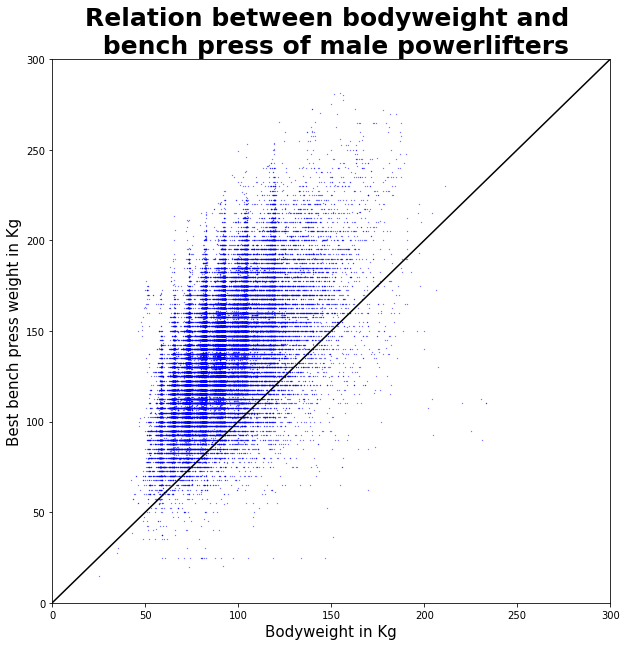

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))

ax.scatter(filter_data['BodyweightKg'],filter_data['Best3BenchKg'], s=.05, c='blue')

#Titles, labels, axes
ax.set_title('Relation between bodyweight and \n bench press of male powerlifters', fontsize=25, fontweight='black')
ax.set_xlabel('Bodyweight in Kg', size=15)
ax.set_ylabel('Best bench press weight in Kg', size=15)

ax.set_xlim(0,300)
ax.set_ylim(0,300)

#y=x line to compare x and y
plt.plot([0,300],[0,300], color='black')

plt.show()

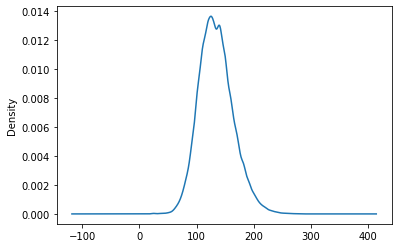

In [ ]:
filter_data['Best3BenchKg'].plot.density()

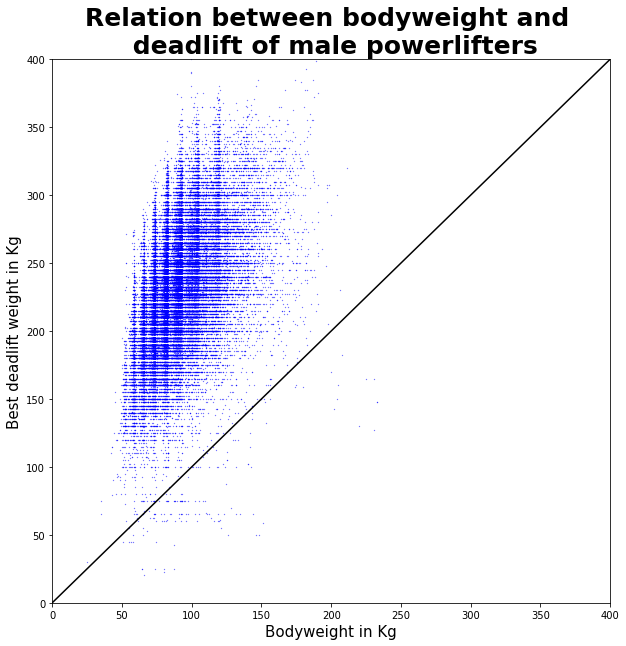

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))

ax.scatter(filter_data['BodyweightKg'],filter_data['Best3DeadliftKg'], s=.05, c='blue')

#Titles, labels, axes
ax.set_title('Relation between bodyweight and \n deadlift of male powerlifters', fontsize=25, fontweight='black')
ax.set_xlabel('Bodyweight in Kg', size=15)
ax.set_ylabel('Best deadlift weight in Kg', size=15)

ax.set_xlim(0,400)
ax.set_ylim(0,400)

#y=x line to compare x and y
plt.plot([0,400],[0,400], color='black')

plt.show()

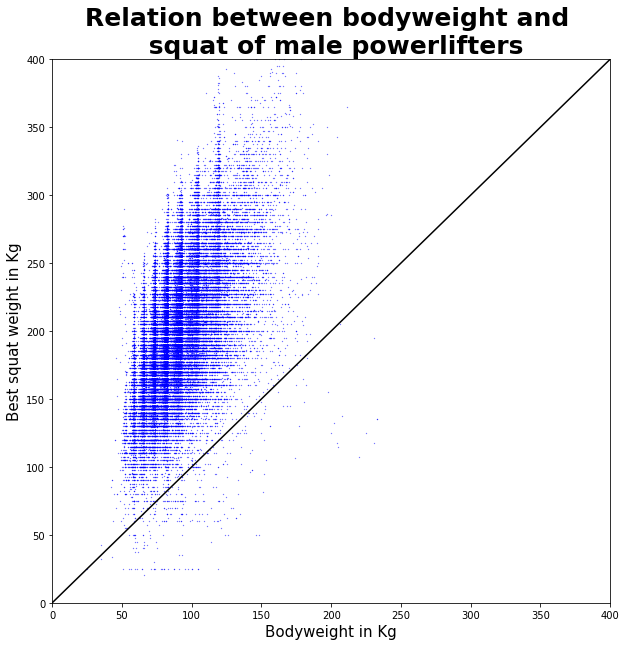

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))

ax.scatter(filter_data['BodyweightKg'],filter_data['Best3SquatKg'], s=.05, c='blue')

#Titles, labels, axes
ax.set_title('Relation between bodyweight and \n squat of male powerlifters', fontsize=25, fontweight='black')
ax.set_xlabel('Bodyweight in Kg', size=15)
ax.set_ylabel('Best squat weight in Kg', size=15)

ax.set_xlim(0,400)
ax.set_ylim(0,400)

#y=x line to compare x and y
plt.plot([0,400],[0,400], color='black')


In [ ]:
filter_dataf = df.sort_values('BodyweightKg').dropna()
filter_dataf = filter_data[filter_data['Age']>=18]
filter_dataf = filter_data[filter_data['Age']<40]
filter_dataf = filter_data[filter_data['Sex']=='F']
filter_dataf = filter_data[filter_data['Equipment']=='Raw']

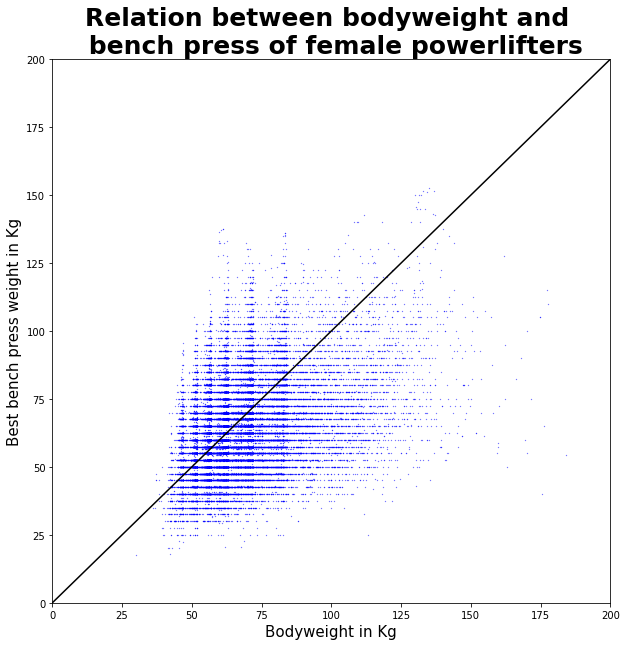

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))

ax.scatter(filter_dataf['BodyweightKg'],filter_dataf['Best3BenchKg'], s=.05, c='blue')

#Titles, labels, axes
ax.set_title('Relation between bodyweight and \n bench press of female powerlifters', fontsize=25, fontweight='black')
ax.set_xlabel('Bodyweight in Kg', size=15)
ax.set_ylabel('Best bench press weight in Kg', size=15)

ax.set_xlim(0,200)
ax.set_ylim(0,200)

#y=x line to compare x and y
plt.plot([0,300],[0,300], color='black')

plt.show()

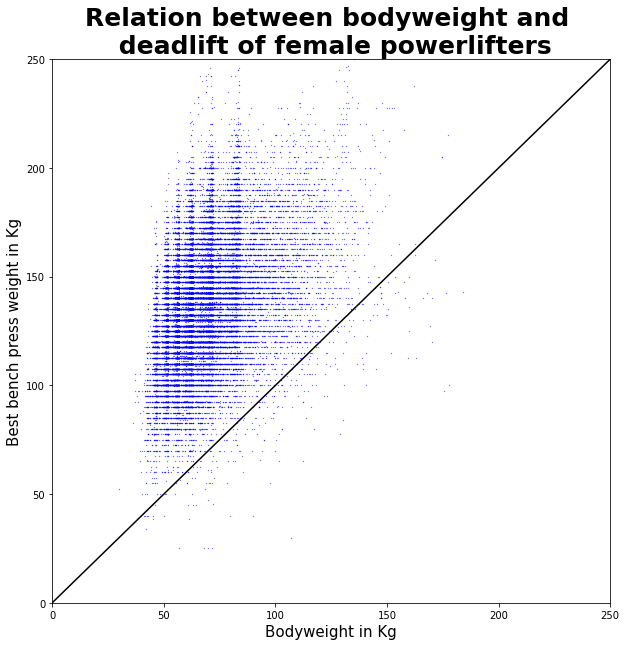

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))

ax.scatter(filter_dataf['BodyweightKg'],filter_dataf['Best3DeadliftKg'], s=.05, c='blue')

#Titles, labels, axes
ax.set_title('Relation between bodyweight and \n deadlift of female powerlifters', fontsize=25, fontweight='black')
ax.set_xlabel('Bodyweight in Kg', size=15)
ax.set_ylabel('Best bench press weight in Kg', size=15)

ax.set_xlim(0,250)
ax.set_ylim(0,250)

#y=x line to compare x and y
plt.plot([0,300],[0,300], color='black')

plt.show()

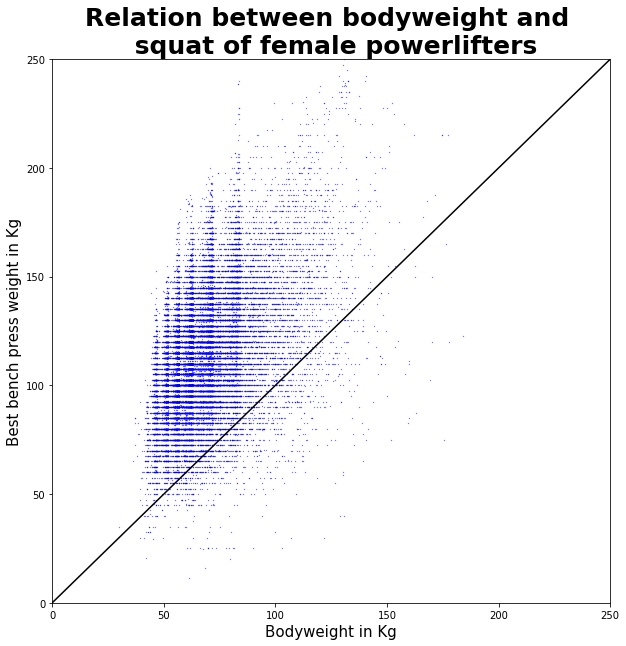

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))

ax.scatter(filter_dataf['BodyweightKg'],filter_dataf['Best3SquatKg'], s=.05, c='blue')

#Titles, labels, axes
ax.set_title('Relation between bodyweight and \n squat of female powerlifters', fontsize=25, fontweight='black')
ax.set_xlabel('Bodyweight in Kg', size=15)
ax.set_ylabel('Best bench press weight in Kg', size=15)

ax.set_xlim(0,250)
ax.set_ylim(0,250)

#y=x line to compare x and y
plt.plot([0,300],[0,300], color='black')

plt.show()